### Introduction to PyTorch Workflow

![PythonWorkflow](workflow.png)

In [1]:
what_are_we_covering = {1: "data (prepare and load)",
                        2: "build model",
                        3: "fitting the model to data (training)",
                        4: "making predictions and evaluating a model (inference)",
                        5: "saving and loading a model",
                        6: "putting it all together"}

what_are_we_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

### Table of Contents :
1. [Data Preparing and Loading](#load)
2. [Splitting data into train and test sets](#split)
3. [Visualising our Data](#visualise)
4. [Building PyTorch Model](#model)
5. [PyTorch Model Building Essentials](#essentials)
6. [Checking the contents of our PyTorch Model](#contents)
7. [Make prediction using torch.inference_mode()](#prediction)
8. [Train Model](#train)
9. [Building a training loop](#loop)
10. [Saving a model in PyTorch](#save)
11. [Loading a PyTorch Model](#modelload)
12. [Putting it all together](#together)


#### Getting setup for the PyTorch workflow module<a class='anchor' id ='setup'>

In [2]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt
import numpy as np

# Check PyTorch version
torch.__version__

'2.0.1'

### 1. Data Preparing and Loading <a class='anchor' id ='load'>
    
    Data can be almost anything... in machine learning.
    * Excel spreadsheet
    * Images of any kind
    * Videos (YouTube has lots of data...)
    * Audio like songs or podcasts
    * DNA
    * Text
    
    Machine learning is a game of two parts:
    1. Get data into a numerical representation.
    2. Build a model to learn patterns in that numerical representation.
    
![Workflow](workflow2.png)
    
<br>
To showcase this, let's create some *known* data using the linear regression formula. We'll use a linear regression formula to make a strainght line with known **parameters**

In [3]:
# Create *known* parameters
weight = 0.7
bias   = 0.3

# Create 
start = 0
end   = 1
step  = 0.02
# unsqueeze: adds extra dimension
X     = torch.arange(start,end,step).unsqueeze(dim=1)
y     = weight * X + bias

X[:10] , y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

### 2. Splitting our data into training and test sets (one of the most important concepts in machine learning in general) <a class='anchor' id ='split'>

![Split](workflow3.png)
    
 Let's create a training and test set with our data.

In [4]:
# Create a train/test split
train_split = int(0.8 *len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test , y_test  = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

### 3. Building a function to visualise our data<a class='anchor' id ='visualise'>

In [5]:
def plot_predictions(train_data  = X_train,
                    train_labels = y_train,
                    test_data    = X_test,
                    test_labels  = y_test,
                    predictions  = None):
    """
    Plots training data, test data and compare predictions.
    """
    
    plt.figure(figsize =(10,7))
    
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label = "Training data")
    
    # Plot test data in green
    plt.scatter(test_data,  test_labels,  c="g", s=4, label = "Testing data")
    
    # Are there predictions?
    if predictions is not None:
        # Plot the predictions if they exists
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
        
    # Show the legend
    plt.legend(prop={"size":14});

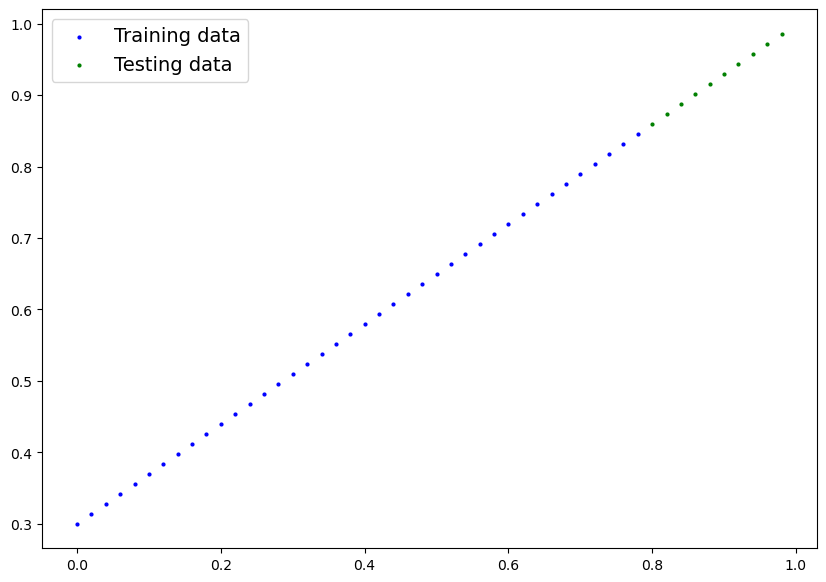

In [6]:
plot_predictions();

### 4. Build PyTorch Model<a class='anchor' id ='model'>
    
    What our model does :
    * Start with random values (weight & bias)
    * Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data)
    
    How does it do so?
    * Through two main algorithms:
    1. Gradient Descent
    2. Backpropogation
    
 ![Workflow4](workflow4.png)

In [7]:
# Create Linear Regression Model class
# torch.nn.Module : Base class for all neural network modules
# Your models should also subclass this class
# Modules can also contain other Modules, allowing to nest them in a tree structure. 
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch inherits from nn.module
    # Creating constructor
    def __init__(self):
        super().__init__()
        # Creating a weights parameter
        # Parameters are tensor subclasses
        self.weights = nn.Parameter(torch.randn(1,
                                               requires_grad = True,
                                               dtype = torch.float))
        self.bias    = nn.Parameter(torch.randn(1,
                                               requires_grad = True,
                                               dtype = torch.float))
        
        # Forward method to define the computation in the model
    def forward(self, x:torch.Tensor) -> torch.Tensor: # <- "x" is the input data
        return self.weights * x + self.bias # this is the linear regression formula
        
        # Aim : Update the randomly initialized numbers to represnt the traget pattern

### 5. PyTorch Model Building essentials <a class='anchor' id ='essentials'>

* *torch.nn*           : contains all the building blocks for computational graphs(a neural network can be considered a computational graph)
* *torch.nn.Parameter* : what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us
* *torch.nn.Module*    : The base class for all neural network module, if you subclass it, you should overwrite forward()
* *torch.optim*        : this is where the optimizers in PyTorch live, they will help with gradient descent.
* *def forward()*      : All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation.

![Workflow5](workflow5.png)

### 6. Checking the contents of our PyTorch Model <a class='anchor' id ='contents'>

Now we've created a model, let's see what's inside...

So we can check out our model parameters or what's inside our model using `parameters()`

In [8]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [9]:
# List named parameters
model_0.state_dict() # Dictionary of the parameters of our model

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [10]:
weight, bias # Ideal value (our randomly initialized values of weights and bias should be as close as possible to the ideal value)

(0.7, 0.3)

### 7. Making prediction using *torch.inference_mode()*<a class='anchor' id ='prediction'>

 To check out model's predictive power, let's see how well it predicts `y-test` based on `X-test`.


 When we pass data through our model, it's going to run through the `forward()` method.

In [11]:
X_test,y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [12]:
y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [13]:
# Make prediction with model
# torch uses inference to make predictions
# inference mode turns off gradient tracking
with torch.inference_mode():
    y_preds = model_0(X_test)

# We can also do something similar with torch.no_grad(), however, inference() mode is preferred
# with torch.no_grad():
#     y_preds = model_0(X_test)
    
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [14]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

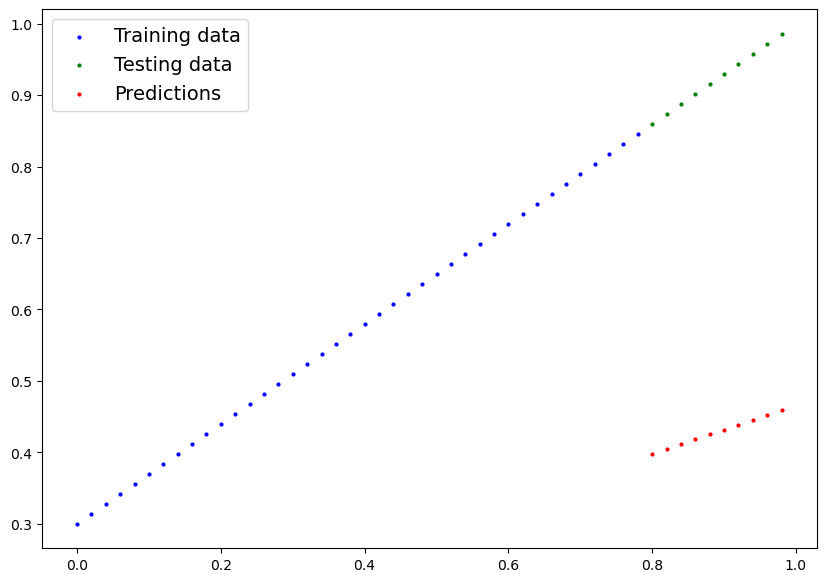

In [15]:
plot_predictions(predictions=y_preds)

### 8. Train Model<a class='anchor' id ='train'>
    
The whole idea of training is for a model to move from some *unknown* parameters (these may be random) to some *known* parameters.
    
Or in other words from a poor representation of data to a better representation of data.
    
One way to measure how poor or how wrong your models predictions are is to use a loss function.
    
* Note : Loss function may also be called cost function or criterion in different areas. For our case, we're going to refer to it as a loss function.

Things we need to train:
    
* **Loss Function:** A function to measure how wrong your models predictions are to the ideal output.
* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters (e.g. weight & bias in our case) to improve the loss function.
    
    * Inside the optimizer we often have to set two parameters:
            * `params` : the model parameters you'd like to optimize, for example `params=model_0.parameters()`
            * lr (learning rate) : the learning rate is a hyperparameter that defines how big/small the optimizer changes the parameters with each step (a small `lr` result in small changes, a large `lr` results in large changes)
    
And specifically for PyTorch, we need:
* A training loop
* A test loop

In [16]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [17]:
# Check out our model's parameters (a parameter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

![wokflow6](workflow6.png)

In [18]:
# Goal : Minimize the value of loss function

# Setup a loss function
loss_fn = nn.L1Loss() # mean absolute error

# Setup an optimizer (stochastic gradient descent)
# torch.optim : pacakage implementing various optimization algorithms
optimizer = torch.optim.SGD(params = model_0.parameters(),
                           lr      = 0.01) # lr = learning rate = possible the most important hyperparameter you can set

In [19]:
loss_fn

L1Loss()

`Q` : Which loss function and optimizer should I use?

`A` : This will be problem specific. But with experience, we get an idea of what works and what doesn't with our particular problem set.

For example, for a regression problem, a loss function of `nn.L1Loss()` and an optimizer like `torch.optim.SGD()` will suffice.

But for a classification problem, like classifying whether a photo is of a dog or a cat, we would likely use a loss function of `nn.BCELoss()` (binary cross entropy loss)

### 9. Building a training loop (and a testing loop) in PyTorch<a class='anchor' id ='loop'>

A couple of things we need in a training loop:


0. Loop through the data and do ...
1. Forward pass (this involves data moving through our model's `forward()` functions) - to make predictions on data - also called forward propogation.
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward : move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**back propagation**)
5. Optimizer step : use the optimizer to adjust our model's parameters to try and improve the loss. (**gradient descent**)

![workflow7](workflow7.png)

#### PyTorch Training Loop
![workflow8](workflow_8.png)
    
#### PyTorch Testing Loop
![workflow8](workflow_9.png)


In [20]:
torch.manual_seed(42)
# An epoch is one loop through the data... (this is a hyperparameter because we've set it ourself)
epochs = 200

# TRack different values
epoch_count = []
loss_values = []
test_loss_values = []

## Training
# 0. Loop through the data
for epoch in range(epochs):
    # Set the model to training mode
    model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gradients
    
    # 1. Forward Pass
    y_pred = model_0(X_train)
    
    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()
    
    # 4. Perform back propogation on the loss with respect to the parameters of the model
    loss.backward()
    
    # 5. Step the optimizer (perform gradient descent)
    optimizer.step() # by default how the optimizer changes will accumulate through the loop so... we have to zero them above in step 3  for the next iteration of the loop 
    
    # Testing
    model_0.eval() # turns off different setting in the model not needed for evaluation/testing (dropout/batch norm layers)
    
    with torch.inference_mode(): # turns off gradient tracking & a couple more things not needed for testing
#     with torch.no_grad() : # you may also see torch.no_grad() in older PyTorch code
        
        # 1. Do the forward pass
        test_pred = model_0(X_test)
        
        # 2. Calculate the loss
        test_loss = loss_fn(test_pred,y_test)
     
    # Print out what's happening
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch: {epoch} | test :{loss} | test loss: {test_loss}")
        # Print out model state_dict()
        print(model_0.state_dict())
    
    

Epoch: 0 | test :0.31288138031959534 | test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | test :0.1976713240146637 | test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | test :0.08908725529909134 | test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | test :0.053148526698350906 | test loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | test :0.04543796554207802 | test loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | test :0.04167863354086876 | test loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | test :0.03818932920694351 | test loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788

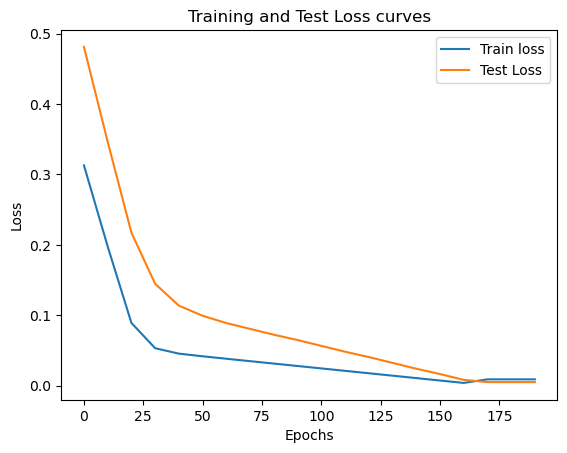

In [31]:
# Plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).cpu().numpy()) ,       label = "Train loss")
plt.plot(epoch_count, test_loss_values, label = "Test Loss" )
plt.title("Training and Test Loss curves")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [21]:
# Making prediction
with torch.inference_mode():
    y_preds_new = model_0(X_test)

In [22]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

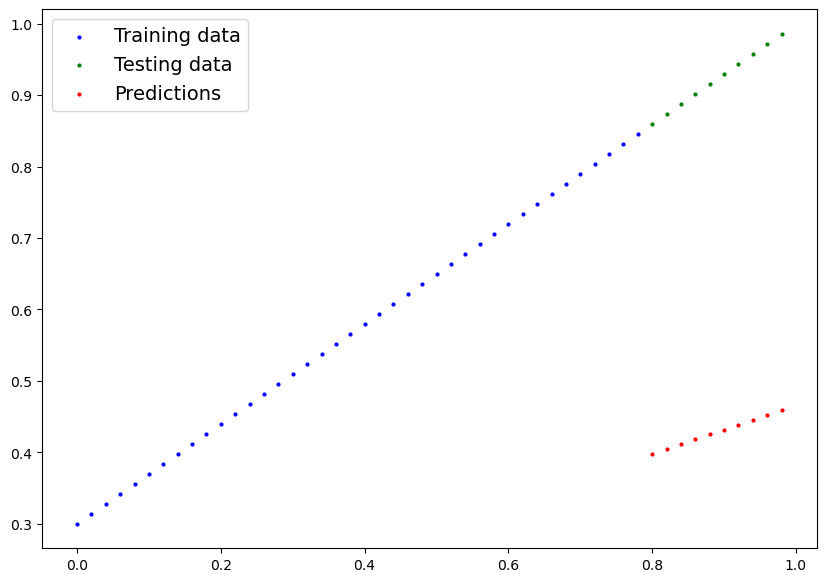

In [23]:
plot_predictions(predictions=y_preds)

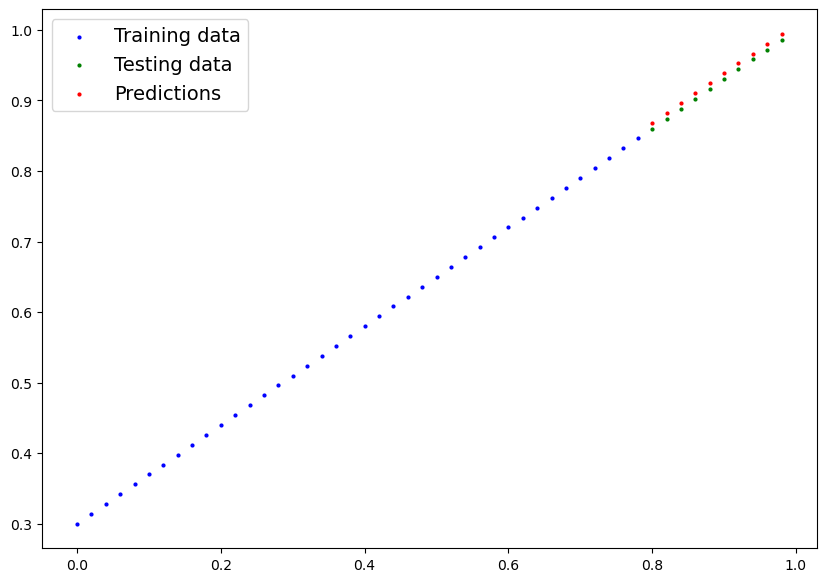

In [24]:
plot_predictions(predictions=y_preds_new)

### 10. Saving a model in PyTorch <a class='anchor' id ='save'>
    
There are three main methods you should know about for saving and loading models in PyTorch.
    
    1. `torch.save()` - allows you save a PyTorch object in Python's pickle format.
    2. `torch.load()` - allows you load a saved PyTorch object
    3. 'torch.nn.Module.load_state_dict()' - this allows to load a model's saved state dictionary


In [33]:
# Saving our PyTorch Model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth" # or .pt extension
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
          f=MODEL_SAVE_PATH)


Saving model to: models/01_pytorch_workflow_model_0.pth


### 11. Loading a PyTorch Model  <a class='anchor' id ='modelload'>

Since we saved our model's `state_dict()` rather the entire model, we'll create a new instance of our model class and load the saved `state_dict()` into that.

In [35]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [39]:
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [40]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [42]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)
loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [45]:
# Make some model preds
model_0.eval()
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [46]:
# Compare loaded model preds with original model preds 
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

### 12. Putting it all together  <a class='anchor' id ='together'>

Let's go back through the steps above and see it all in one place

In [48]:
# Import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check Python version
torch.__version__

'2.0.1'

Create device agnostic code.

This means if we've got access to a GPU, our code will use it (for potentially faster computing).

If no GPU is available, the code will default to using GPU.

In [50]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


#### 11.1 Data

In [52]:
# Create some data using linear regression formula of y = weight * x + bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start,end,step).unsqueeze(dim=1) # without unsqueeze, errors will pop up
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [53]:
# Split data
train_split = int(0.8* len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test   = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

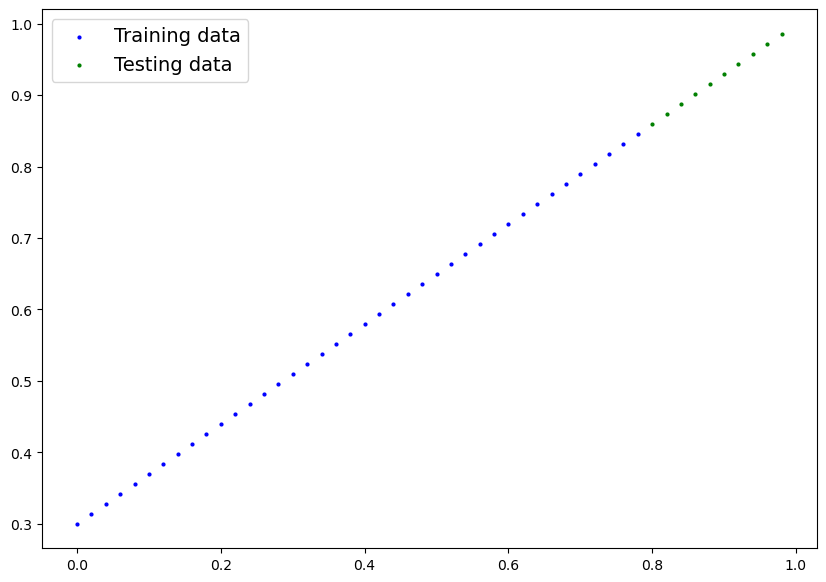

In [54]:
# Plot the data
# Note: If you don't have the plot predictions() fnctions loaded, this will error
plot_predictions(X_train,y_train,X_test,y_test)

#### 11.2 Building a PyTorch Linear Model
![workflow10](workflow_10.png)

In [59]:
# Create a Linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters (apply linear transformation to the incoming data)
        # also called linear transform, probing layer, fully connected layer, dense layer
        self.linear_layer = nn.Linear(in_features=1, # data that goes in
                                     out_features=1) # data that comes out
    # pass x to the linear layer
    def forward(self,x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)
    
# Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [61]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [57]:
X_train[:5], y_train[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [62]:
# Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [63]:
# Set the model to use the target device
model_1.to(device) # Send the model to gpu memory if available
next(model_1.parameters()).device

device(type='cpu')

#### 11.3 Training

For training we need:
* Loss function
* Optimizer
* Training loop
* Testing loop

In [64]:
# Setup loss function
loss_fn = nn.L1Loss() #same as MAE

# Setup our optmizer
optimizer = torch.optim.SGD(params = model_1.parameters(),
                                     lr = 0.01)

In [67]:
# Let's write a training loop
torch.manual_seed(42)

epochs = 200

# Put data on the target device (device agnostic code for data)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test  = X_test.to(device)
y_test  = y_test.to(device)

for epoch in range(epochs):
    model_1.train()
    
    # 1. Forward Pass
    y_pred = model_1(X_train)
    
    # 2. Calculate the loss
    loss = loss_fn(y_pred,y_train)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()
    
    # 4. Perform back propogation
    loss.backward()
    
    # 5. Optimizer step
    optimizer.step()
    
    # Testing
    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(X_test)
        
        test_loss = loss_fn(test_pred,y_test)
    
    # Print out what's happening
    if epoch%10 == 0:
        print(f"Epoch: {epoch} | Loss:{loss} | Test loss: {test_loss}")

Epoch: 0 | Loss:0.0012645028764382005 | Test loss: 0.013801807537674904
Epoch: 10 | Loss:0.0012645028764382005 | Test loss: 0.013801807537674904
Epoch: 20 | Loss:0.0012645028764382005 | Test loss: 0.013801807537674904
Epoch: 30 | Loss:0.0012645028764382005 | Test loss: 0.013801807537674904
Epoch: 40 | Loss:0.0012645028764382005 | Test loss: 0.013801807537674904
Epoch: 50 | Loss:0.0012645028764382005 | Test loss: 0.013801807537674904
Epoch: 60 | Loss:0.0012645028764382005 | Test loss: 0.013801807537674904
Epoch: 70 | Loss:0.0012645028764382005 | Test loss: 0.013801807537674904
Epoch: 80 | Loss:0.0012645028764382005 | Test loss: 0.013801807537674904
Epoch: 90 | Loss:0.0012645028764382005 | Test loss: 0.013801807537674904
Epoch: 100 | Loss:0.0012645028764382005 | Test loss: 0.013801807537674904
Epoch: 110 | Loss:0.0012645028764382005 | Test loss: 0.013801807537674904
Epoch: 120 | Loss:0.0012645028764382005 | Test loss: 0.013801807537674904
Epoch: 130 | Loss:0.0012645028764382005 | Test lo

In [68]:
model_1.state_dict() # showing weights and bias

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [70]:
weight,bias

(0.7, 0.3)

#### 11.4 Making and evaluating predictions

In [71]:
# Turn the model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

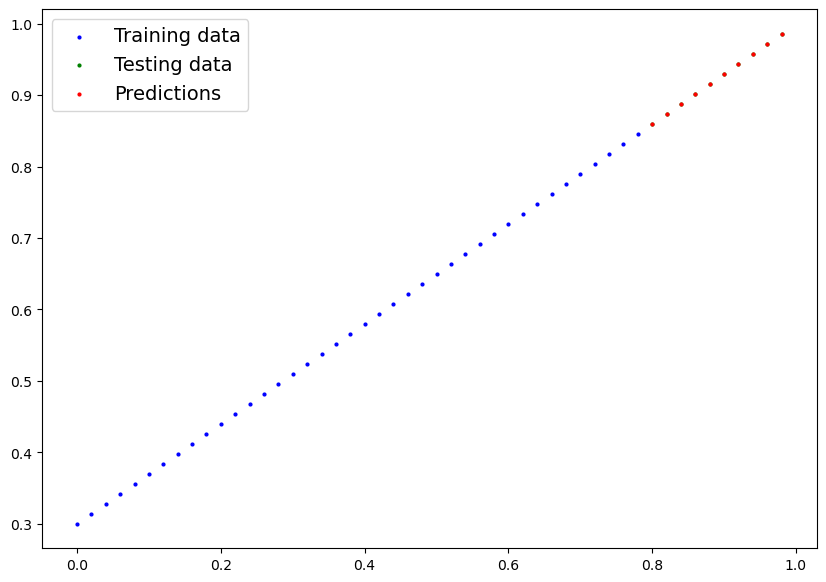

In [73]:
# Check out our model predictions visually
plot_predictions(predictions=y_preds.cpu()) # predictions are on top of testing data

#### 11.5 Saving & loading a trained model

In [74]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth" # or .pt extension
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
          f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_1.pth


#### 11.5 Load a PyTorch Model

In [75]:
# Load a PyTorch Model

# Create a new instance of linear regression model V2
loaded_model_1 = LinearRegressionModelV2()

# Load the saved model_1 state dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put the loaded model to device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [76]:
next(loaded_model_1.parameters()).device

device(type='cpu')

In [77]:
loaded_model_1.state_dict

<bound method Module.state_dict of LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)>

In [78]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])